In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import layers
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [29]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [30]:
# Loading and Spliting Data in Test and Train 
(X_train_f, y_train_f), (X_valid_f, y_valid_f) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train_f.shape == (60000, 28, 28)
assert X_valid_f.shape == (10000, 28, 28)
assert y_train_f.shape == (60000,)
assert y_valid_f.shape == (10000,)

In [31]:
#defining class names
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

In [32]:
X_train_f.shape

(60000, 28, 28)

In [33]:
y_valid_f.shape

(10000,)

In [34]:
y_train_f[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

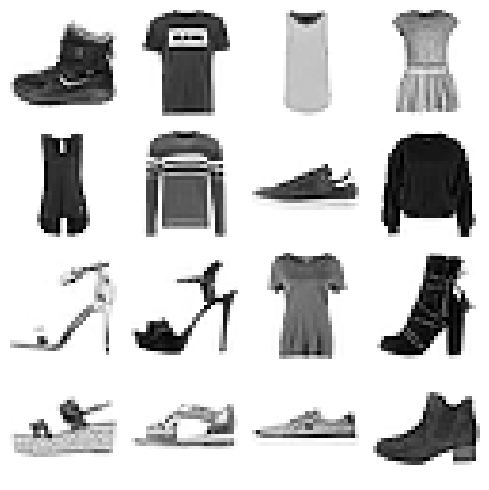

In [35]:
#visualizing few examples
plt.figure(figsize=(5,5))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(X_train_f[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
print(X_valid_f.shape)
print(y_valid_f.shape)

(10000, 28, 28)
(10000,)


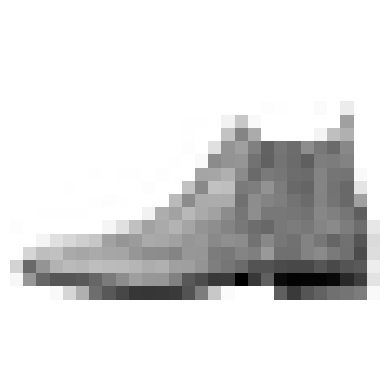

In [37]:
plt.imshow(X_valid_f[0],cmap='Greys')
plt.axis('off')
plt.show()

In [38]:
#Preprocessing
# Reshaping (flattening) images 2d to 1d 
X_train_reshaped = X_train_f.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid_f.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")


X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [39]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train_f, num_classes)
y_validation = keras.utils.to_categorical(y_valid_f, num_classes)

In [40]:
print(y_valid_f[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [61]:
#Building Neural Network (sequential model)
model = Sequential()

# Add layers to the model
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes and softmax activation

# Compiling the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#Training the model
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)


Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1191 - loss: 2.3281 - val_accuracy: 0.1138 - val_loss: 2.2967
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1643 - loss: 2.2952 - val_accuracy: 0.2199 - val_loss: 2.2902
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2889 - loss: 2.2887 - val_accuracy: 0.3387 - val_loss: 2.2825
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3223 - loss: 2.2803 - val_accuracy: 0.3881 - val_loss: 2.2726
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3479 - loss: 2.2695 - val_accuracy: 0.2810 - val_loss: 2.2584
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3268 - loss: 2.2535 - val_accuracy: 0.4007 - val_loss: 2.2355
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3740 - loss: 2.2273 - val_accuracy: 0.3317 - val_loss: 2.1963
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3305 - loss: 2.1820 - val_accu

In [63]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_validation, y_validation)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8510 - loss: 0.4330
Validation loss: 0.4430248439311981
Validation accuracy: 0.8450000286102295


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


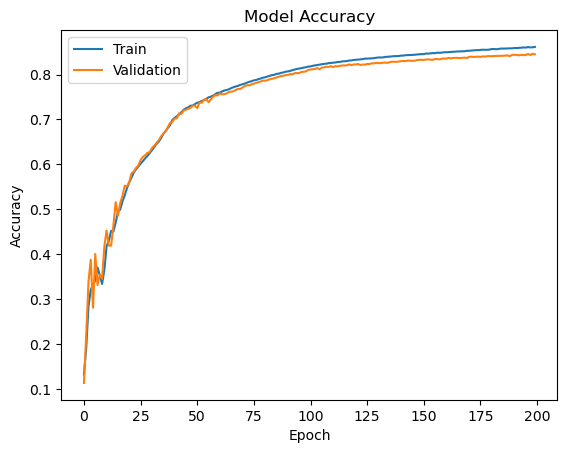

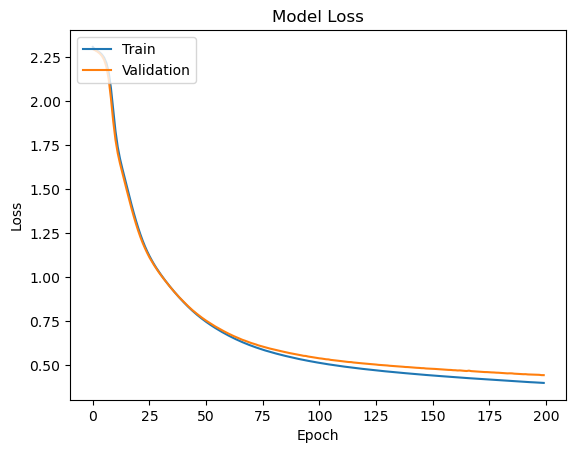

In [64]:
#plotting the curves

print(history.history.keys())

# Summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class label: 2
Predicted class name: Pullover


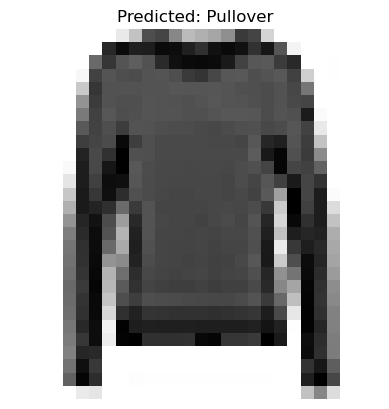

In [78]:
# Assume X_test is your single image
single_image = X_valid_f[99]  # Assuming X_valid_f contains only one image

# Preprocess the image
single_image_reshaped = single_image.reshape(1, 784).astype('float32') / 255

# Make the prediction
prediction = model.predict(single_image_reshaped)

# Get the predicted class label
predicted_class = np.argmax(prediction)

# Print the predicted class label
print("Predicted class label:", predicted_class)
print("Predicted class name:", classes_names[predicted_class])

# Display the image
plt.imshow(single_image, cmap='Greys')
plt.axis('off')
plt.title("Predicted: " + classes_names[predicted_class])
plt.show()


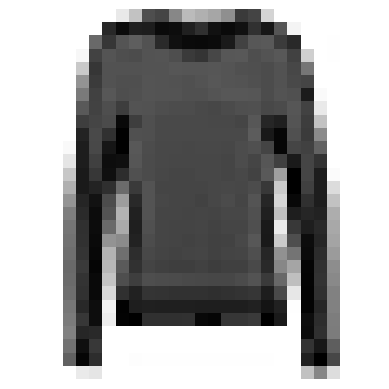

In [80]:
plt.imshow(X_valid_f[99],cmap='Greys')
plt.axis('off')
plt.show()

In [70]:
# Your confusion matrix code here and in additional code cells as needed
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_validation)

#using argmax to find target with highest value
cm = confusion_matrix( y_validation.argmax(axis =1), y_prediction.argmax(axis = 1))
print(cm)
print("Validation accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[824   2  13  52   3   3  91   0  12   0]
 [  0 951  10  31   4   0   2   0   2   0]
 [ 19   1 775  13 124   0  65   0   3   0]
 [ 31  16   9 864  32   0  44   0   4   0]
 [  0   2 115  32 774   0  74   0   3   0]
 [  0   0   0   1   0 931   0  40   4  24]
 [164   3 134  43 107   1 526   0  22   0]
 [  0   0   0   0   0  34   0 935   0  31]
 [  1   1   5  11   3  11  29   3 935   1]
 [  0   0   0   1   0  21   0  42   1 935]]
Validation accuracy: 0.8450000286102295


In [92]:
# Predict on the training set
train_predictions = model.predict(X_training)
train_predicted_classes = np.argmax(train_predictions, axis=1)

# Predict on the validation set
validation_predictions = model.predict(X_validation)
validation_predicted_classes = np.argmax(validation_predictions, axis=1)

# Display the first few predictions for the training set
print("Training Set Predictions:")
print(train_predicted_classes[:30])

# Display the first few predictions for the validation set
print("\nValidation Set Predictions:")
print(validation_predicted_classes[:30])



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Set Predictions:
[9 0 3 0 3 2 7 4 5 5 0 9 5 5 7 9 1 0 2 4 3 1 4 8 2 3 0 2 4 4]

Validation Set Predictions:
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 0 5 7 7 1 2 6 0 9 3]
